# Carga de librerías y dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv(r'C:\Users\faste\Documents\Cursos\ICARO- Data Science\TP1\sube2020.csv')

<hr>

# Exploración dataset

In [3]:
df.head(20)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2020-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2154,NO
1,2020-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,1492,NO
2,2020-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1889,NO
3,2020-01-01,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,4669,NO
4,2020-01-01,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,187,NO
5,2020-01-01,EL URBANO SRL,BS_AS_LINEA_527,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,543,NO
6,2020-01-01,TRANSPORTES LINEA 123 S.A.C.I.,BS_ASLINEA_123,SI,COLECTIVO,NACIONAL,JN,SD,1927,NO
7,2020-01-01,TRANPORTES VEINTIDOS DE SETIEMBRE S.A.C.,BSAS_LINEA_002,SI,COLECTIVO,NACIONAL,JN,SD,6408,NO
8,2020-01-01,GENERAL TOMAS GUIDO S.A.C.I.F.,BSAS_LINEA_009,SI,COLECTIVO,NACIONAL,JN,SD,5879,NO
9,2020-01-01,LINEA 10 S.A.,BSAS_LINEA_010,SI,COLECTIVO,NACIONAL,JN,SD,4531,NO


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356628 entries, 0 to 356627
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   356628 non-null  object
 1   NOMBRE_EMPRESA   356628 non-null  object
 2   LINEA            356628 non-null  object
 3   AMBA             356628 non-null  object
 4   TIPO_TRANSPORTE  356628 non-null  object
 5   JURISDICCION     354067 non-null  object
 6   PROVINCIA        354067 non-null  object
 7   MUNICIPIO        354067 non-null  object
 8   CANTIDAD         356628 non-null  int64 
 9   DATO_PRELIMINAR  356628 non-null  object
dtypes: int64(1), object(9)
memory usage: 27.2+ MB


In [5]:
df.isna().sum()

DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       2561
PROVINCIA          2561
MUNICIPIO          2561
CANTIDAD              0
DATO_PRELIMINAR       0
dtype: int64

In [6]:
df.describe()

,CANTIDAD
count,356628.000000
mean,5026.148881
std,13371.656183
min,-43.000000
25%,287.000000
50%,1313.000000
75%,4840.000000
max,603766.000000


<hr>


## Análisis univariado de la columna 'PROVINCIA'

#### Chequeamos valores nulos

In [7]:
print(df['PROVINCIA'].value_counts())
print('----------------------------')
print(df['PROVINCIA'].isna())
df['PROVINCIA'].isna().sum()

BUENOS AIRES        115444
MENDOZA              73880
JN                   57376
SAN JUAN             24176
JUJUY                19802
NEUQUÉN              11201
SANTA FE              8586
RÍO NEGRO             8202
ENTRE RÍOS            5957
CHUBUT                5421
CATAMARCA             5171
CHACO                 4098
SAN LUIS              4027
FORMOSA               3426
CORRIENTES            3190
LA PAMPA              2605
TIERRA DEL FUEGO       732
LA RIOJA               672
CORDOBA                101
Name: PROVINCIA, dtype: int64
----------------------------
0         False
1         False
2         False
3         False
4         False
          ...  
356623    False
356624    False
356625    False
356626    False
356627    False
Name: PROVINCIA, Length: 356628, dtype: bool


2561

#### Observamos la distribución de frecuencias a través de un gráfico de barras

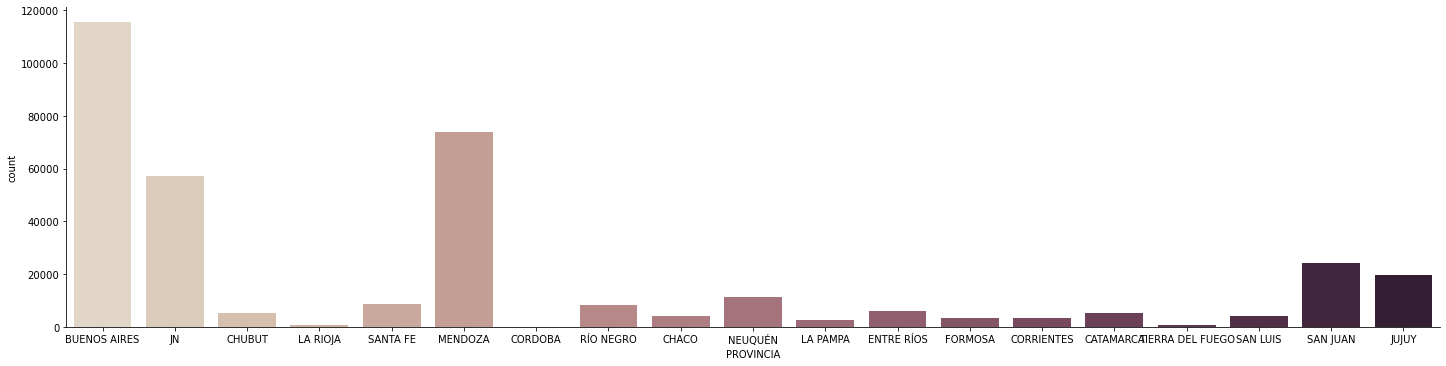

In [8]:
sns.catplot(x="PROVINCIA", kind="count", palette="ch:.25", data=df, aspect=4) #aspect = relacion largo/alto
plt.show()

#### Aplicamos la técnica de label encoding para poder continuar el análisis de 'PROVINCIA'

In [9]:
# Creamos una instancia del codificador de etiquetas
labelencoder = LabelEncoder()

In [10]:
# Creamos la columna 'PROVINCIA_CAT'
df['PROVINCIA_CAT'] = labelencoder.fit_transform(df['PROVINCIA'])
df.loc[:,['PROVINCIA','PROVINCIA_CAT']].sample(10)


,PROVINCIA,PROVINCIA_CAT
173602,MENDOZA,12
210343,MENDOZA,12
72535,BUENOS AIRES,0
340850,BUENOS AIRES,0
82002,SANTA FE,17
187658,BUENOS AIRES,0
189484,BUENOS AIRES,0
166286,BUENOS AIRES,0
8111,MENDOZA,12
191553,MENDOZA,12


In [11]:
# De este print obtenemos la etiqueta #19 para la categoría nan
df.loc[df['PROVINCIA'].isna()][['PROVINCIA','PROVINCIA_CAT']]

,PROVINCIA,PROVINCIA_CAT
361,NaN,19
524,NaN,19
525,NaN,19
526,NaN,19
527,NaN,19
...,...,...
356254,NaN,19
356255,NaN,19
356256,NaN,19
356604,NaN,19


In [12]:
#Cantidad de variables nulas:
print('Cantidad de valores en categoría 19: ',df.loc[df['PROVINCIA_CAT']==19][['PROVINCIA','PROVINCIA_CAT']].shape[0])


Cantidad de valores en categoría 19:  2561


In [13]:
df['PROVINCIA_CAT'].value_counts()

0     115444
12     73880
8      57376
15     24176
9      19802
13     11201
17      8586
14      8202
6       5957
3       5421
1       5171
2       4098
16      4027
7       3426
5       3190
10      2605
19      2561
18       732
11       672
4        101
Name: PROVINCIA_CAT, dtype: int64

In [14]:
df.isna().sum()

DIA_TRANSPORTE        0
NOMBRE_EMPRESA        0
LINEA                 0
AMBA                  0
TIPO_TRANSPORTE       0
JURISDICCION       2561
PROVINCIA          2561
MUNICIPIO          2561
CANTIDAD              0
DATO_PRELIMINAR       0
PROVINCIA_CAT         0
dtype: int64

In [15]:
# Observamos de que tipo de dato es nuestra columna {PROVINCIA_CAT}
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356628 entries, 0 to 356627
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   356628 non-null  object
 1   NOMBRE_EMPRESA   356628 non-null  object
 2   LINEA            356628 non-null  object
 3   AMBA             356628 non-null  object
 4   TIPO_TRANSPORTE  356628 non-null  object
 5   JURISDICCION     354067 non-null  object
 6   PROVINCIA        354067 non-null  object
 7   MUNICIPIO        354067 non-null  object
 8   CANTIDAD         356628 non-null  int64 
 9   DATO_PRELIMINAR  356628 non-null  object
 10  PROVINCIA_CAT    356628 non-null  int32 
dtypes: int32(1), int64(1), object(9)
memory usage: 28.6+ MB


#### Reemplazamos los valores que se corresponden a los nulos con SimpleImputer

In [16]:
#Dada la asimetria en la distribución de datos, consideramos más apropiada la mediana a la media
imputer=SimpleImputer(missing_values=19,strategy='median') 

In [17]:
# Ajustamos y transformamos la columna PROVINCIAS
temp_imp=imputer.fit_transform(df.PROVINCIA_CAT.values.reshape(-1, 1))
temp_imp

array([[0.],
       [0.],
       [0.],
       ...,
       [2.],
       [8.],
       [0.]])

In [18]:
# Verificacion
df['PROVINCIA_CAT'] = temp_imp
df.loc[df['PROVINCIA_CAT']==19].shape[0]

0

In [19]:
df['PROVINCIA_CAT'].value_counts()

0.0     115444
12.0     73880
8.0      59937
15.0     24176
9.0      19802
13.0     11201
17.0      8586
14.0      8202
6.0       5957
3.0       5421
1.0       5171
2.0       4098
16.0      4027
7.0       3426
5.0       3190
10.0      2605
18.0       732
11.0       672
4.0        101
Name: PROVINCIA_CAT, dtype: int64

In [20]:
# Creamos un diccionario con las claves
categ = df['PROVINCIA_CAT'].unique().astype('int')
prov = df.loc[df['PROVINCIA'].notna()]['PROVINCIA'].unique()

claves = dict(zip(categ,prov))
claves

{0: 'BUENOS AIRES',
 8: 'JN',
 3: 'CHUBUT',
 11: 'LA RIOJA',
 17: 'SANTA FE',
 12: 'MENDOZA',
 4: 'CORDOBA',
 14: 'RÍO NEGRO',
 2: 'CHACO',
 13: 'NEUQUÉN',
 10: 'LA PAMPA',
 6: 'ENTRE RÍOS',
 7: 'FORMOSA',
 5: 'CORRIENTES',
 1: 'CATAMARCA',
 18: 'TIERRA DEL FUEGO',
 16: 'SAN LUIS',
 15: 'SAN JUAN',
 9: 'JUJUY'}

#### Realizo una inspección de los datos

In [21]:
df.loc[df['PROVINCIA'].isna()][['PROVINCIA','PROVINCIA_CAT']]

,PROVINCIA,PROVINCIA_CAT
361,NaN,8.0
524,NaN,8.0
525,NaN,8.0
526,NaN,8.0
527,NaN,8.0
...,...,...
356254,NaN,8.0
356255,NaN,8.0
356256,NaN,8.0
356604,NaN,8.0


#### Aquí observamos que SimpleImputer ha rellenado todos los valores 19 con 8. 

In [22]:
df.loc[df['PROVINCIA'].isna()]['PROVINCIA_CAT'].value_counts()

8.0    2561
Name: PROVINCIA_CAT, dtype: int64

In [23]:
df[['PROVINCIA','PROVINCIA_CAT']].sample(25)

,PROVINCIA,PROVINCIA_CAT
277077,BUENOS AIRES,0.0
261803,JN,8.0
266210,BUENOS AIRES,0.0
26617,JUJUY,9.0
309981,BUENOS AIRES,0.0
278435,MENDOZA,12.0
160897,SAN JUAN,15.0
306020,MENDOZA,12.0
292160,BUENOS AIRES,0.0
292158,BUENOS AIRES,0.0


#### Defino loop para obtener los valores corregidos en 'PROVINCIAS'

In [24]:
# Obtengo un array con mis categorias, tipo int y órdenadas
rang = df['PROVINCIA_CAT'].unique()
rang.sort()
rang = rang.astype('int')
rang

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18])

In [25]:
def loop(i):
    for i in rang[i:]:
        print(i)
        if df.loc[df['PROVINCIA_CAT']==i]['PROVINCIA'].isna().sum() >0:
            new= df.loc[df['PROVINCIA_CAT']==i]['PROVINCIA'].fillna(claves[i])
            return new
        loop(i+1)
        break
            
    

In [26]:
# Realizo el reemplazo en todas las filas nan de {PROVINCIAS}

for i in rang:
        
        if df.loc[df['PROVINCIA_CAT']==i]['PROVINCIA'].isna().sum() >0:
            newdf= df.loc[df['PROVINCIA_CAT']==i]['PROVINCIA'].fillna(claves[i])
            print(i)
            newdf2 = loop(i+1)
newdf

8
9
10
11
12
13
14
15
16
17
18


6         JN
7         JN
8         JN
9         JN
10        JN
          ..
356601    JN
356602    JN
356604    JN
356606    JN
356626    JN
Name: PROVINCIA, Length: 59937, dtype: object

In [27]:
# Verificamos la existencia de valores nulos
print('Cantidad de nulos: ',newdf.isna().sum())
print('Cantidad total de datos: ',newdf)

Cantidad de nulos:  0
Cantidad total de datos:  6         JN
7         JN
8         JN
9         JN
10        JN
          ..
356601    JN
356602    JN
356604    JN
356606    JN
356626    JN
Name: PROVINCIA, Length: 59937, dtype: object


In [28]:
df['PROVINCIA'].isna().sum()

2561

In [29]:
df['PROVINCIA'].fillna(newdf, inplace = True)
print(df['PROVINCIA'].isna().sum())

0


In [30]:
df.sample(50)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,PROVINCIA_CAT
286192,2020-10-21,EMPRESA MAIPU S.R.L,LINEA 881,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,273,NO,12.0
316667,2020-11-21,MICRO OMNIBUS AVENIDA S.A.,BSAS_LINEA_520B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,6779,NO,0.0
216004,2020-08-10,AUTOTRANSPORTES LOS ANDES S.A. Y EL CACIQUE S....,LINEA 352,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,1134,NO,12.0
227445,2020-08-22,TRANSPORTE AUTOMOTORES LA PLATA SA,BSAS_LINEA_406,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,7631,NO,0.0
159687,2020-06-10,EL CACIQUE S.A.,LINEA 943,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,620,NO,12.0
115684,2020-04-23,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 101,SI,COLECTIVO,NACIONAL,JN,SD,8927,NO,8.0
235852,2020-08-30,TRANSPORTE DE PASAJEROS EL TRIUNFO SA,LINEA_119-3_SJ,NO,COLECTIVO,PROVINCIAL,SAN JUAN,SN,45,NO,15.0
282950,2020-10-18,EMPRESA DE TRANSPORTE DEL SUR SRL,BSAS_LINEA_404,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,5518,NO,0.0
286672,2020-10-22,M.O.D.O. S.A. DE TRANSPORTE AUTOMOTOR,BSAS_LINEA_151,SI,COLECTIVO,NACIONAL,JN,SD,12648,NO,8.0
333761,2020-12-09,UNION PLATENSE SRL,BSAS_LINEA_502_SUR,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LA PLATA,5274,NO,0.0


## A continuación realizaremos el reemplazo de datos nulos de 'JURISDICCION' 

In [31]:
# Jurisdiscción

# Creamos una instancia del codificador de etiquetas
labelencoder = LabelEncoder()

# Creamos la columna 'PROVINCIA_CAT'
df['JUR_CAT'] = labelencoder.fit_transform(df['JURISDICCION'])

In [32]:
# De este print obtenemos la etiqueta #3 para la categoría nan
df.loc[df['JURISDICCION'].isna()][['JURISDICCION','JUR_CAT']]

,JURISDICCION,JUR_CAT
361,NaN,3
524,NaN,3
525,NaN,3
526,NaN,3
527,NaN,3
...,...,...
356254,NaN,3
356255,NaN,3
356256,NaN,3
356604,NaN,3


In [33]:
#Cantidad de variables nulas:
print('Cantidad de valores en categoría 3: ',df.loc[df['JUR_CAT']==3][['JURISDICCION','JUR_CAT']].shape[0])

Cantidad de valores en categoría 3:  2561


#### Reemplazamos los valores que se corresponden a los nulos con SimpleImputer

In [34]:
# Respetando el criterio tomado para las provincias utilizamos la mediana.
imputer = SimpleImputer(missing_values=3,strategy='median')

# Ajustamos y transformamos la columna PROVINCIAS
temp_impJur=imputer.fit_transform(df.JUR_CAT.values.reshape(-1, 1))
temp_impJur

array([[0.],
       [2.],
       [0.],
       ...,
       [2.],
       [1.],
       [0.]])

In [35]:
# Verificacion
df['JUR_CAT'] = temp_impJur
df.loc[df['JUR_CAT']==3].shape[0]

0

In [36]:
# Creamos un diccionario con las claves
categJ = df['JUR_CAT'].unique().astype('int')
juris = df.loc[df['JURISDICCION'].notna()]['JURISDICCION'].unique()

claves = dict(zip(categJ,juris))
claves

{0: 'MUNICIPAL', 2: 'PROVINCIAL', 1: 'NACIONAL'}

#### Aquí observamos que SimpleImputer ha rellenado todos los valores 3 con 1. 

In [37]:
df.loc[df['JURISDICCION'].isna()]['JUR_CAT'].value_counts()

1.0    2561
Name: JUR_CAT, dtype: int64

In [38]:
# Obtengo un array con mis categorias, tipo int y órdenadas
rang = df['JUR_CAT'].unique()
rang.sort()
rang = rang.astype('int')
rang

array([0, 1, 2])

In [39]:
# Como sé que a todos los valores nan se les ha asignado el valor {Nacional}, efectúo el reemplazo:

for i in rang:
        
        if df.loc[df['JUR_CAT']==i]['JURISDICCION'].isna().sum() >0:
            newdf= df.loc[df['JUR_CAT']==i]['JURISDICCION'].fillna(claves[i])
            
            
newdf

6         NACIONAL
7         NACIONAL
8         NACIONAL
9         NACIONAL
10        NACIONAL
            ...   
356601    NACIONAL
356602    NACIONAL
356604    NACIONAL
356606    NACIONAL
356626    NACIONAL
Name: JURISDICCION, Length: 59937, dtype: object

In [40]:
df['JURISDICCION'].fillna(newdf, inplace = True)
print(df['JURISDICCION'].isna().sum())

0


In [41]:
df.sample(50)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,PROVINCIA_CAT,JUR_CAT
196391,2020-07-20,PEHUENCHE S A,LINEA_017_NQN,NO,COLECTIVO,MUNICIPAL,NEUQUÉN,NEUQUEN,464,NO,13.0,0.0
82514,2020-03-19,AUTOTRANSPORTES LOS ANDES S.A. Y EL CACIQUE S....,LINEA 300,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,501,NO,12.0,2.0
333472,2020-12-08,T. A. SAN GABRIEL S.A.,LINEA_518_BAHIA,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,BAHIA BLANCA,495,NO,0.0,0.0
279879,2020-10-15,LOS CONSTITUYENTES S.A.T.,BSAS_LINEA_127,SI,COLECTIVO,NACIONAL,JN,SD,8162,NO,8.0,1.0
116955,2020-04-24,EMPRESA VERCELLI HNOS S A C I F A E I,LINEA_006_SN,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,SAN NICOLAS DE LOS ARROYOS,85,NO,0.0,0.0
9591,2020-01-10,CONTINENTAL TRANSPORTE PÚBLICO AUTOMOTOR S.R.L,LINEA_500K_STA_FE,NO,COLECTIVO,PROVINCIAL,SANTA FE,SN,11455,NO,17.0,2.0
39681,2020-02-09,TRANSPORTES ATLANTIDA S.A.C.,BSAS_LINEA_057,SI,COLECTIVO,NACIONAL,JN,SD,22909,NO,8.0,1.0
16497,2020-01-17,CRUCERO DEL SUR AGRUPACION,LINEA_095_FOR,NO,COLECTIVO,MUNICIPAL,FORMOSA,FORMOSA,3675,NO,7.0,0.0
309789,2020-11-14,TRANSPORTES SAN JUAN BAUTISTA S.A.,BSAS_LINEA_511,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,FLORENCIO VARELA,863,NO,0.0,0.0
271122,2020-10-06,LINEA 213 S.A. DE TRANSPORTE,BSAS_LINEA_053,SI,COLECTIVO,NACIONAL,JN,SD,22701,NO,8.0,1.0


## A continuación realizaremos el reemplazo de datos nulos de 'Municipio' 

In [42]:
# Municipio

# Creamos una instancia del codificador de etiquetas
labelencoder = LabelEncoder()

# Creamos la columna 'PROVINCIA_CAT'
df['MUN_CAT'] = labelencoder.fit_transform(df['MUNICIPIO'])

In [43]:
# De este print obtenemos la etiqueta #72 para la categoría nan
df.loc[df['MUNICIPIO'].isna()][['MUNICIPIO','MUN_CAT']]

,MUNICIPIO,MUN_CAT
361,NaN,72
524,NaN,72
525,NaN,72
526,NaN,72
527,NaN,72
...,...,...
356254,NaN,72
356255,NaN,72
356256,NaN,72
356604,NaN,72


In [44]:
#Cantidad de variables nulas:
print('Cantidad de valores en categoría 72: ',df.loc[df['MUN_CAT']==72][['MUNICIPIO','MUN_CAT']].shape[0])

Cantidad de valores en categoría 72:  2561


#### Reemplazamos los valores que se corresponden a los nulos con SimpleImputer

In [45]:
# Respetando el criterio tomado para las provincias utilizamos la mediana.
imputer = SimpleImputer(missing_values=72,strategy='median')

# Ajustamos y transformamos la columna PROVINCIAS
temp_impMun=imputer.fit_transform(df.MUN_CAT.values.reshape(-1, 1))
temp_impMun

array([[17.],
       [61.],
       [17.],
       ...,
       [61.],
       [60.],
       [64.]])

In [46]:
# Verificacion
df['MUN_CAT'] = temp_impMun
df.loc[df['MUN_CAT']==72].shape[0]

0

In [47]:
# Creamos un diccionario con las claves
categM = df['MUN_CAT'].unique().astype('int')
munis = df.loc[df['MUNICIPIO'].notna()]['MUNICIPIO'].unique()

claves = dict(zip(categM,munis))
claves

{17: 'GENERAL PUEYRREDON',
 61: 'SN',
 0: 'ALMIRANTE BROWN',
 26: 'LANUS',
 60: 'SD',
 18: 'GENERAL RODRIGUEZ',
 4: 'BRANDSEN',
 29: 'LUJAN',
 32: 'MERLO',
 14: 'FLORENCIO VARELA',
 41: 'PILAR',
 11: 'ESTEBAN ECHEVERRIA',
 27: 'LOBOS',
 33: 'MORENO',
 12: 'EXALTACION DE LA CRUZ',
 30: 'MALVINAS ARGENTINAS',
 25: 'LA PLATA',
 57: 'SAN VICENTE',
 10: 'ESCOBAR',
 13: 'EZEIZA',
 28: 'LOMAS DE ZAMORA',
 1: 'AVELLANEDA',
 44: 'QUILMES',
 3: 'BERAZATEGUI',
 24: 'LA MATANZA',
 34: 'MORON',
 19: 'GENERAL SAN MARTIN',
 51: 'SAN ISIDRO',
 50: 'SAN FERNANDO',
 62: 'TIGRE',
 54: 'SAN MIGUEL',
 22: 'JOSE C. PAZ',
 64: 'URBANO DE LA COSTA',
 68: 'VILLA ALLENDE',
 7: 'CIPOLLETTI',
 37: 'OLAVARRIA',
 70: 'VILLA GESELL',
 23: 'JUNIN',
 46: 'RAWSON',
 43: 'PRESIDENCIA ROQUE SAENZ PEÑA',
 8: 'COMODORO RIVADAVIA',
 36: 'NEUQUEN',
 53: 'SAN MARTIN DE LOS ANDES',
 40: 'PERGAMINO',
 59: 'SANTA ROSA',
 39: 'PARANA',
 58: 'SANTA FE',
 55: 'SAN NICOLAS DE LOS ARROYOS',
 47: 'RESISTENCIA',
 49: 'SAN CARLOS DE BAR

#### Aquí observamos que SimpleImputer ha rellenado todos los valores 72 con 60. 

In [48]:
df.loc[df['MUNICIPIO'].isna()]['MUN_CAT'].value_counts()

60.0    2561
Name: MUN_CAT, dtype: int64

In [49]:
# Obtengo un array con mis categorias, tipo int y órdenadas
rang = df['MUN_CAT'].unique()
rang.sort()
rang = rang.astype('int')
rang

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71])

In [50]:
# Como sé que a todos los valores nan se les ha asignado el valor {SD}, efectúo el reemplazo:
newdf= df.loc[df['MUN_CAT']==60]['MUNICIPIO'].fillna(claves[60])                   
newdf

6         SD
7         SD
8         SD
9         SD
10        SD
          ..
356601    SD
356602    SD
356604    SD
356606    SD
356626    SD
Name: MUNICIPIO, Length: 59937, dtype: object

In [51]:
df['MUNICIPIO'].fillna(newdf, inplace = True)
print(df['MUNICIPIO'].isna().sum())

0


In [52]:
df.sample(50)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,PROVINCIA_CAT,JUR_CAT,MUN_CAT
36864,2020-02-06,EMPRESA MAIPU S.R.L.,LINEA 204,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,590,NO,12.0,2.0,61.0
319009,2020-11-23,EMPR.TRANSP AUTOMOTOR DE PASAJEROS GRAL SAVIO SRL,LINEA_049_PAL_PROV,NO,COLECTIVO,PROVINCIAL,JUJUY,SN,1904,NO,9.0,2.0,61.0
118265,2020-04-26,LA CENTRAL DE VICENTE LOPEZ S.A.,BSAS_LINEA_143,SI,COLECTIVO,NACIONAL,JN,SD,1151,NO,8.0,1.0,60.0
301966,2020-11-06,TRANSPORTES COLEGIALES S.A.C.I.,LINEA 42,SI,COLECTIVO,NACIONAL,JN,SD,12829,NO,8.0,1.0,60.0
221621,2020-08-16,UNION PLATENSE SRL,BSAS_LINEA_273,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,2571,NO,0.0,2.0,61.0
241515,2020-09-05,EXPRESO COLONIA SA,LINEA_004_NQN,NO,COLECTIVO,MUNICIPAL,NEUQUÉN,SAN MARTIN DE LOS ANDES,256,NO,13.0,0.0,53.0
317215,2020-11-21,LINEAS G.M. SRL,LINEA_105_CAT,NO,COLECTIVO,PROVINCIAL,CATAMARCA,SN,704,NO,1.0,2.0,61.0
345516,2020-12-20,EMPRESA DE TRANSPORTE DEL SUR SRL,LINEA_119_AMBA,SI,COLECTIVO,NACIONAL,JN,SD,2501,NO,8.0,1.0,60.0
76979,2020-03-14,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,BSAS_LINEA_325,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,6110,NO,0.0,2.0,61.0
262464,2020-09-27,EMPRESA DEL OESTE SAT,BSAS_LINEA_244,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,747,NO,0.0,2.0,61.0


## Obtuvimos nuestro dataframe sin valores null

In [53]:
df.isna().sum()

DIA_TRANSPORTE     0
NOMBRE_EMPRESA     0
LINEA              0
AMBA               0
TIPO_TRANSPORTE    0
JURISDICCION       0
PROVINCIA          0
MUNICIPIO          0
CANTIDAD           0
DATO_PRELIMINAR    0
PROVINCIA_CAT      0
JUR_CAT            0
MUN_CAT            0
dtype: int64

In [54]:
df.drop(['PROVINCIA_CAT', 'JUR_CAT', 'MUN_CAT'], axis=1, inplace=True)

In [55]:
df.sample(50)

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
289800,2020-10-25,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,BSAS_LINEA_378,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,3046,NO
167432,2020-06-18,EMPRESA DE TRANSPORTE AMANCAY SRL,LINEA_081_BRC,NO,COLECTIVO,MUNICIPAL,RÍO NEGRO,SAN CARLOS DE BARILOCHE,661,NO
228280,2020-08-23,ERSA URBANO SA,BSAS_LINEA_133,SI,COLECTIVO,NACIONAL,JN,SD,2322,NO
166945,2020-06-18,ALMAFUERTE EMPRESA DE TRANSPORTE S.A.C.I. E I,BSAS_LINEA_622,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LA MATANZA,14571,NO
127978,2020-05-06,EMPRESA MAIPU S.R.L,LINEA 860,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,37,NO
172653,2020-06-24,EMPRESA MAIPU S.R.L.,LINEA 251,NO,COLECTIVO,PROVINCIAL,MENDOZA,SN,76,NO
84267,2020-03-21,EMPRESA DE TRANSPORTE DEL SUR SRL,BSAS_LINEA_200,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,423,NO
158106,2020-06-08,EMPRESA CEFERINO SOCIEDAD ANONIMA,Línea G,NO,COLECTIVO,MUNICIPAL,RÍO NEGRO,VIEDMA,84,NO
228869,2020-08-23,TRANSPORTE MARIANO MORENO SRL,LINEA_009_PRN,NO,COLECTIVO,MUNICIPAL,ENTRE RÍOS,PARANA,89,NO
138635,2020-05-18,D.O.T.A. S.A. DE TRANSPORTE AUTOMOTOR,LINEA 28,SI,COLECTIVO,NACIONAL,JN,SD,23003,NO


## Cambiamos el tipo de dato en la variable {DIA_TRANSPORTE}

In [56]:
df['DIA_TRANSPORTE'] = pd.to_datetime(df['DIA_TRANSPORTE'])
df['DIA_TRANSPORTE'] = df['DIA_TRANSPORTE'].dt.strftime('%d/%m/%Y')

In [57]:
# Nos deshacemos de la columna DATO_PRELIMINAR dado que no aporta al estudio
df.drop(['DATO_PRELIMINAR'], axis=1, inplace=True)

In [58]:
df.head()

,DIA_TRANSPORTE,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD
0,01/01/2020,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,2154
1,01/01/2020,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,1492
2,01/01/2020,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1889
3,01/01/2020,AUTOBUSES BUENOS AIRES S.R.L. – TRANSPORTE LAR...,BS_AS_LINEA_514,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,ALMIRANTE BROWN,4669
4,01/01/2020,EL URBANO SRL,BS_AS_LINEA_522,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,LANUS,187


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356628 entries, 0 to 356627
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   DIA_TRANSPORTE   356628 non-null  object
 1   NOMBRE_EMPRESA   356628 non-null  object
 2   LINEA            356628 non-null  object
 3   AMBA             356628 non-null  object
 4   TIPO_TRANSPORTE  356628 non-null  object
 5   JURISDICCION     356628 non-null  object
 6   PROVINCIA        356628 non-null  object
 7   MUNICIPIO        356628 non-null  object
 8   CANTIDAD         356628 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 24.5+ MB
